In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\Tanish_Gupta\OneDrive\Desktop\ML Projects\ML Models\house-price-prediction\notebook


In [3]:
df = pd.read_csv("../data/Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## DATA PREPROCESSING

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# If missing values exist:

In [9]:
''' Numeric column:
df['column_name'].fillna(df['column_name'].mean(), inplace=True)
Categorical column:
df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)
'''

" Numeric column:\ndf['column_name'].fillna(df['column_name'].mean(), inplace=True)\nCategorical column:\ndf['column_name'].fillna(df['column_name'].mode()[0], inplace=True)\n"

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# if we see any duplicate rows
#df.drop_duplicates(inplace=True)

# Handle Categorical Variables

In [12]:
# Label Encoding
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})

In [13]:
# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,parking,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,2,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,1,3,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,1,2,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,1,3,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,1,2,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,0,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,1,0,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,0,False,False,False,False,False,False,False


# Feature Selection

In [15]:
X = df.drop('price', axis=1)

In [16]:
y = df['price']

In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Build Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
y_pred = model.predict(X_test)

## Evaluate Model

In [24]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 970043.4039201644


In [25]:
# R² Score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.6529242642153175


## Visualization

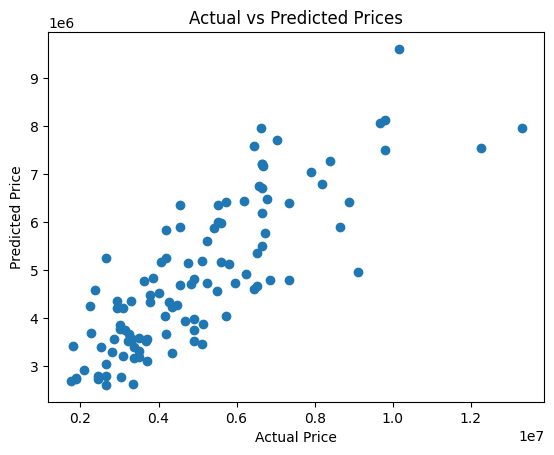

In [26]:
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

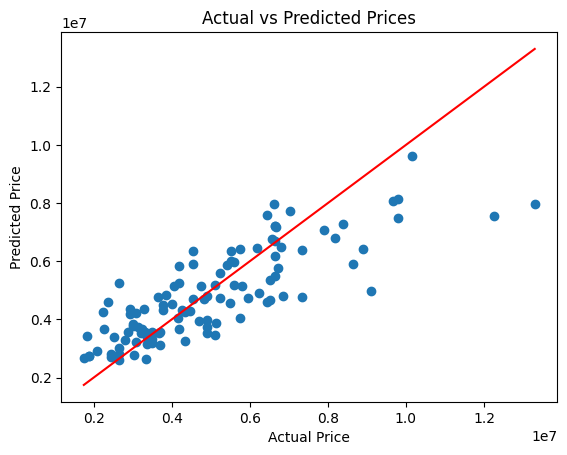

In [27]:
plt.scatter(y_test, y_pred)

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


# Using Seaborn

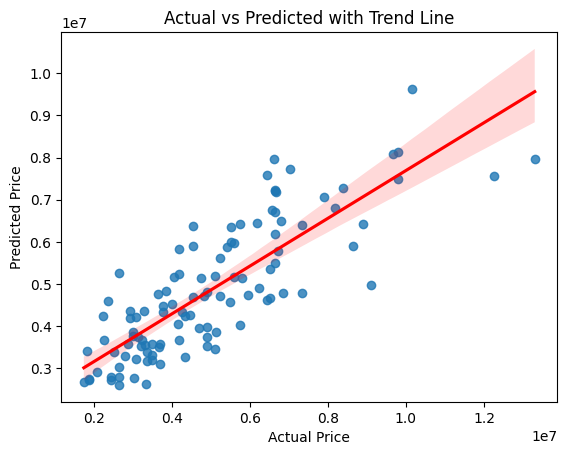

In [28]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted with Trend Line")
plt.show()
